In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
!unzip "/content/drive/MyDrive/Training1.zip"  

Archive:  /content/drive/MyDrive/Training1.zip
   creating: Training1/
   creating: Training1/Closed_Eyes/
  inflating: Training1/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/s0001_00005_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/s0001_00006_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/s0001_00008_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/s0001_00009_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/s0001_00010_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/s0001_00012_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/s0001_00013_0_0_0_0_0_01.png  
  inflating: Training1/Closed_Eyes/

In [ ]:
img_array=cv2.imread("Training1/Open_Eyes/s0028_00578_0_1_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)

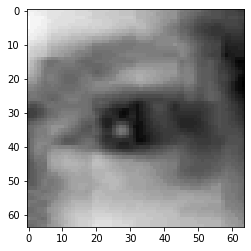

In [ ]:
plt.imshow(img_array,cmap="gray")

In [ ]:
img_array.shape

(64, 64)

In [ ]:
Data = "Training1/"
Classes = ["Closed_Eyes","Open_Eyes"]
img_size = 224

In [ ]:
training = []
def create_training_data():
    for category in Classes:
        path = os.path.join(Data,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
                
                img_array = cv2.imread(os.path.join(path,img))
               
                new_array = cv2.resize(img_array,(img_size,img_size))
                training.append([new_array,class_num])
        

In [ ]:
create_training_data()

In [ ]:
print(len(training))

2309


In [ ]:
import random
random.shuffle(training)

In [ ]:
X = []
y = []
for features , label in training:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size , img_size , 3)
Y = np.array(y)


In [ ]:
X.shape

(2309, 224, 224, 3)

In [ ]:
X = X/255.0;


In [ ]:
Y = np.array(y)


In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.01,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    )

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
new_model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [ ]:
new_model.fit(X,Y,epochs = 5, validation_split = 0.1)

Epoch 1/5
65/65 [==============================] - 47s 208ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 20.7880 - val_accuracy: 0.4459
Epoch 2/5
65/65 [==============================] - 12s 184ms/step - loss: 0.0174 - accuracy: 0.9966 - val_loss: 25.6450 - val_accuracy: 0.4459
Epoch 3/5
65/65 [==============================] - 12s 187ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 5.3905 - val_accuracy: 0.4632
Epoch 4/5
65/65 [==============================] - 12s 188ms/step - loss: 0.0033 - accuracy: 0.9986 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 5/5
65/65 [==============================] - 12s 188ms/step - loss: 1.8660e-04 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 0.9957


In [ ]:
new_model.save("mymodel.h5")

In [2]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/mymodel.h5")

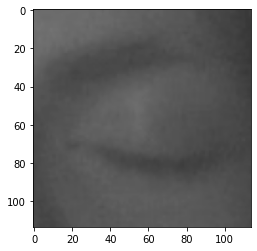

In [5]:
img_size = 224
img_array = cv2.imread('/content/drive/MyDrive/s0002_00001_0_0_0_0_0_01.png')
plt.imshow(img_array)

new_array = cv2.resize(img_array,(img_size,img_size))


In [6]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [7]:
X_input = X_input/255.0

In [8]:
prediction = new_model.predict(X_input)

In [9]:
prediction = int(prediction)
prediction

0

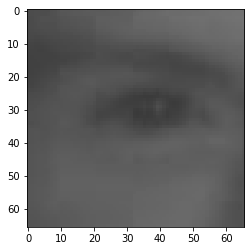

In [10]:
img_size = 224
img_array = cv2.imread('/content/drive/MyDrive/s0026_00487_0_0_1_0_0_01.png')

plt.imshow(img_array)

In [11]:
new_array = cv2.resize(img_array,(img_size,img_size))
X_input = np.array(new_array).reshape(1,img_size,img_size,3)
X_input = X_input/255.0
prediction = new_model.predict(X_input)
prediction = prediction.round()
prediction

array([[1.]], dtype=float32)

In [ ]:
#@title

!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py



--2021-05-27 04:18:16--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.08s   

2021-05-27 04:18:17 (10.7 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2021-05-27 04:18:17--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercont